In [44]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('../data/raw/activity.csv')

In [11]:
df.head()

,Datum,Beskrivning,Belopp
0,10/02/2024,PERIODENS DEL AV ÅRSAVGIFT FÖR KONTOT,"135,00"
1,10/01/2024,HEMKOP SABIS STOCKHO 09 STOCKHOLM,"151,85"
2,09/30/2024,BRA MAT DANDERY DANDERYD,"145,00"
3,09/30/2024,COOP ERIK DAHLBERGSGATA STOCKHOLM,"25,95"
4,09/30/2024,HEMKOP SABIS STOCKHO 09 STOCKHOLM,"333,05"


In [19]:
#Fix data types
df['Belopp'] = df['Belopp'].str.replace(',', '.').astype(float)
df['Datum'] = pd.to_datetime(df['Datum'])

In [34]:
df

,Datum,Beskrivning,Belopp,Cumulative_Belopp
0,2024-10-02,PERIODENS DEL AV ÅRSAVGIFT FÖR KONTOT,135.00,135.00
1,2024-10-01,HEMKOP SABIS STOCKHO 09 STOCKHOLM,151.85,286.85
2,2024-09-30,BRA MAT DANDERY DANDERYD,145.00,431.85
3,2024-09-30,COOP ERIK DAHLBERGSGATA STOCKHOLM,25.95,457.80
4,2024-09-30,HEMKOP SABIS STOCKHO 09 STOCKHOLM,333.05,790.85
5,2024-09-30,SL STOCKHOLM,84.00,874.85
6,2024-09-29,AHLENS AB STOCKHOLM,2538.10,3412.95
7,2024-09-29,AHLENS AB STOCKHOLM,4198.20,7611.15
8,2024-09-29,CLAS OHLSON STOCKHOLM,24.90,7636.05
9,2024-09-29,HEMKOP SABIS STOCKHO 09 STOCKHOLM,624.71,8260.76


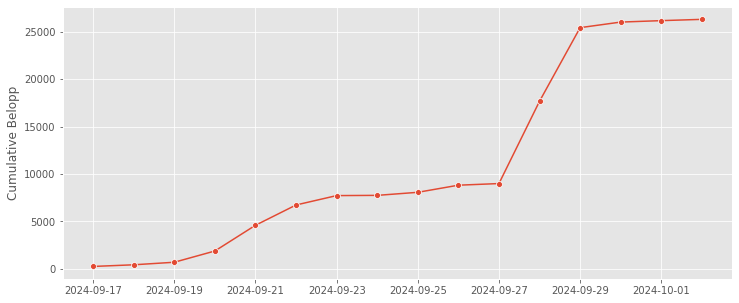

In [66]:
plt.style.use('ggplot')
# Plot the cumulative sum over time
data_to_plot = df.groupby('Datum',as_index=False).agg({'Belopp':'sum'})
data_to_plot['Cumulative_Belopp'] = data_to_plot['Belopp'].cumsum()
plt.figure(figsize=(12, 5))
sns.lineplot(data_to_plot,x='Datum', y='Cumulative_Belopp',marker='o')
plt.xlabel('')
plt.ylabel('Cumulative Belopp')
plt.title('')
plt.grid(True)
plt.show()

In [42]:
json_data = df['Beskrivning'].to_json()

# Use json.loads to parse the JSON string, then json.dumps to pretty print it
formatted_json = json.dumps(json.loads(json_data), indent=4, ensure_ascii=False)

# Print the nicely formatted JSON
print(formatted_json)

{
    "0": "PERIODENS DEL AV ÅRSAVGIFT FÖR KONTOT",
    "1": "HEMKOP SABIS STOCKHO 09 STOCKHOLM",
    "2": "BRA MAT DANDERY         DANDERYD",
    "3": "COOP ERIK DAHLBERGSGATA STOCKHOLM",
    "4": "HEMKOP SABIS STOCKHO 09 STOCKHOLM",
    "5": "SL                      STOCKHOLM",
    "6": "AHLENS AB               STOCKHOLM",
    "7": "AHLENS AB               STOCKHOLM",
    "8": "CLAS OHLSON             STOCKHOLM",
    "9": "HEMKOP SABIS STOCKHO 09 STOCKHOLM",
    "10": "ICA SUPERMARKET FALTOVE STOCKHOLM",
    "11": "AHLENS AB               STOCKHOLM",
    "12": "AHLENS AB               STOCKHOLM",
    "13": "AHLENS AB               STOCKHOLM",
    "14": "AHLENS AB               STOCKHOLM",
    "15": "HEMKOP SABIS STOCKHO 09 STOCKHOLM",
    "16": "HEMKOP SABIS STOCKHO 09 STOCKHOLM",
    "17": "OSCAR JACOBSON          STOCKHOLM",
    "18": "APOTEKET AB             SOLNA",
    "19": "COOP ERIK DAHLBERGSGATA STOCKHOLM",
    "20": "HEMKOP SABIS STOCKHO 09 STOCKHOLM",
    "21": "MENO MALE Ö